In [1]:
codedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code"
imagedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/imagedir"
datadir = ("/Users/admin/Udel/FASTLab/Summer2021_Research/"
           "SESNspectraPCA/Data/DataProducts")

In [2]:
import sys  
sys.path.insert(0, codedir)

In [3]:
import os
import glob

# import sklearn
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
# import astropy.units as u
# import astropy.constants as c
# from scipy.integrate import trapezoid
# from astropy.convolution import convolve_fft, convolve, Gaussian1DKernel

import SNIDsn
import SNIDdataset as snid
# import SNePCA

# import degrade
# import kernels
# import plotutils
# import utils
# import classify_PCASVC as cps

import astrodash as ad

# from collections import OrderedDict

from importlib import reload

custom_mplstyle = ("https://raw.githubusercontent.com/FoxFortino"
                   "/DSPS_WFortino/main/custom.mplstyle")
plt.style.use(custom_mplstyle)

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
Trn_dir = "/Users/admin/UDel/FASTLab/astrodash/templates/training_set/"
Trn = glob.glob(os.path.join(Trn_dir, "*.lnw"))
nTrn = len(Trn)

In [5]:
# See Figure 2 of DASH paper
SNphases = {
    (-20, -18): 0,
    (-18, -14): 0,
    (-14, -10): 0,
    (-10, -6): 0,
    (-6, -2): 0,
    (-2, 2): 0,
    (2, 6): 0,
    (6, 10): 0,
    (10, 14): 0,
    (14, 18): 0,
    (18, 22): 0,
    (22, 26): 0,
    (26, 30): 0,
    (30, 34): 0,
    (34, 38): 0,
    (38, 42): 0,
    (42, 46): 0,
    (46, 50): 0
}

In [21]:
snidObj.save??

Signature: snidObj.save(path='./', protocol=2)
Source:   
    def save(self, path='./', protocol=2):
        """
        Saves the SNIDsn object using pickle. Filename is
        automatically generated using the sn name stored
        in the SNIDsn.header['SN'] field.

        Parameters
        ----------
        path : string
        protocol : int
            pickle protocol. Default protocol=2 makes
            pickle object Python 2.7 and 3.4 compatible.

        Returns
        -------

        """
        filename = self.header['SN']
        f = open(path+filename+'.pickle', 'wb')
        pickle.dump(self, f, protocol=protocol)
        f.close()
        return
File:      ~/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNIDsn.py
Type:      method


In [6]:
SNtypes = {}
nSNe = 0

SPECtypes = {}
nSpec = 0

for SN in Trn:
    snidObj = SNIDsn.SNIDsn()
    snidObj.loadSNIDlnw(SN)
    SNtype = snidObj.header["TypeStr"]
        
    valid_phase = (snidObj.phases > -20) & (snidObj.phases < 50)
    phases = snidObj.phases[valid_phase]
    nPhases = len(phases)
    
    # Check to make sure that, when we remove spectra that have phase less
    # than -20 and greater than 50, we haven't removed every single spectra
    # for that SN. Because in that case our accounting of the number of SNe
    # must reflect that.
    if nPhases != 0:
        nSNe += 1
        if SNtype in SNtypes:
            SNtypes[SNtype] += 1
        else:
            SNtypes[SNtype] = 1

        nSpec += nPhases
        if SNtype in SPECtypes:
            SPECtypes[SNtype] += nPhases
        else:
            SPECtypes[SNtype] = nPhases
    
        for phase in phases:
            for phase_range in (SNphases.keys()):
                if (phase > phase_range[0]) & (phase < phase_range[1]):
                    SNphases[phase_range] += 1

In [7]:
nSNe, nSpec

(511, 3875)

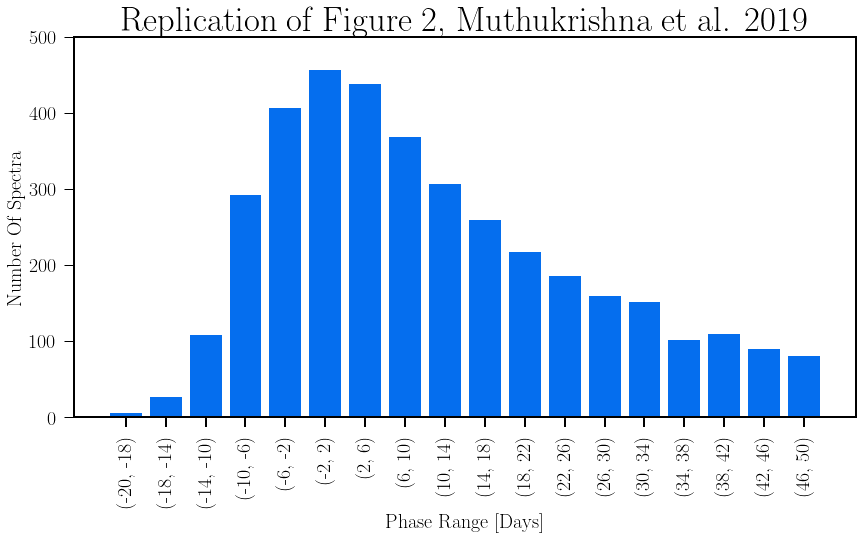

In [15]:
"""Remake Fig. 2 from DASH paper"""
phase_ranges = list(SNphases.keys())
phase_ranges = [str(phase_range) for phase_range in phase_ranges]
nSNe_per_range = list(SNphases.values())

plt.figure(figsize=(14, 7))
plt.title("Replication of Figure 2, Muthukrishna et al. 2019")
plt.bar(range(len(SNphases)), nSNe_per_range, tick_label=phase_ranges)

plt.ylabel("Number Of Spectra")
plt.xlabel("Phase Range [Days]")

plt.ylim((0, 500))
plt.tick_params(axis="x", rotation=90)
plt.tick_params(axis="both", which="minor",
                bottom=False, top=False,
                left=False, right=False)

plt.show()

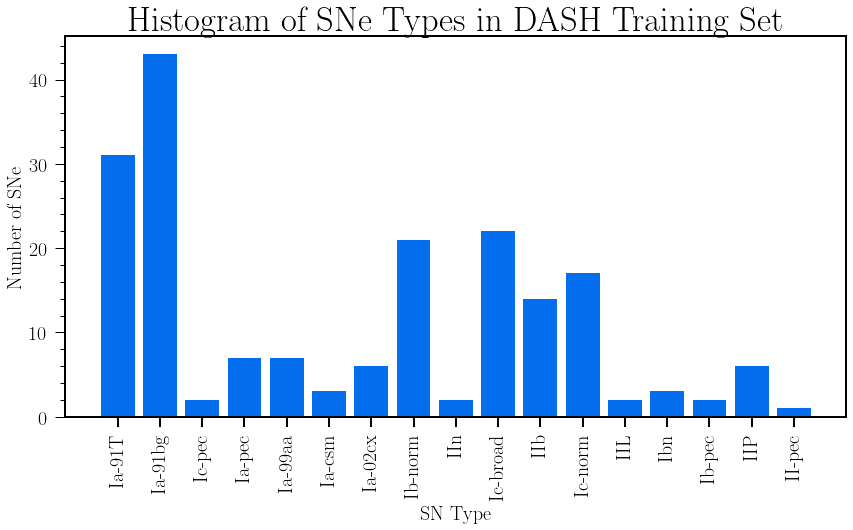

In [17]:
"""Histogram of types of SNe"""
SNe = list(SNtypes.keys())
num_SNe = list(SNtypes.values())
del SNe[1], num_SNe[1]  # Remove SN Ia-norm

plt.figure(figsize=(14, 7))
plt.title("Histogram of SNe Types in DASH Training Set")
plt.bar(range(len(SNe)), num_SNe, tick_label=SNe)

plt.ylabel("Number of SNe")
plt.xlabel("SN Type")

# plt.ylim((0, 500))
plt.tick_params(axis="x", rotation=90)
plt.tick_params(axis="x", which="minor",
                bottom=False, top=False,
                left=False, right=False)

plt.show()

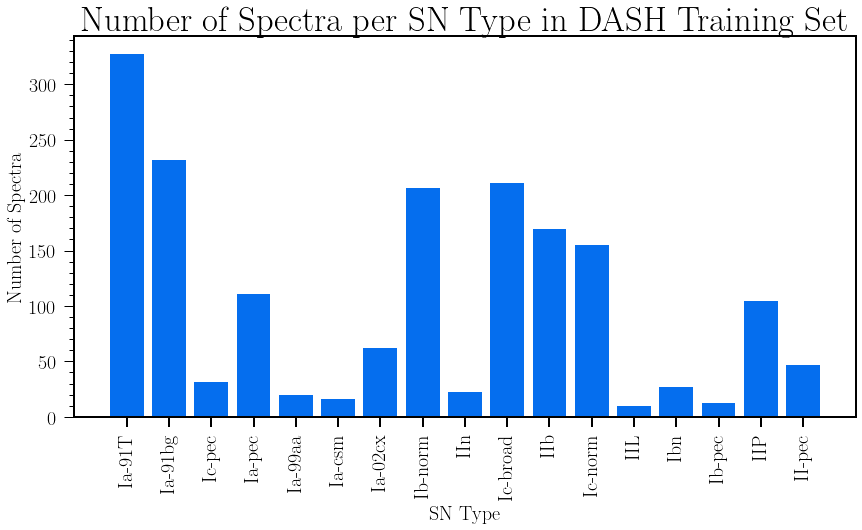

In [19]:
"""Histogram of number of spectra for each SNe"""
SNe = list(SPECtypes.keys())
num_Spec = list(SPECtypes.values())
del SNe[1], num_Spec[1]  # Remove SN Ia-norm

plt.figure(figsize=(14, 7))
plt.title("Number of Spectra per SN Type in DASH Training Set")
plt.bar(range(len(SNe)), num_Spec, tick_label=SNe)

plt.ylabel("Number of Spectra")
plt.xlabel("SN Type")

# plt.ylim((0, 500))
plt.tick_params(axis="x", rotation=90)
plt.tick_params(axis="x", which="minor",
                bottom=False, top=False,
                left=False, right=False)

plt.show()